In [1]:
#import modules
import numpy as np
import scipy
import snpy
import os
sn_dir=[]  #list of SN in directory that have already been fitter (or attempted to be fitted)
filtB_dir=[] #complete directory of filters fitted for B-band
filtJ_dir=[] #complete directory of filters fitted for J-band
countz=0

#list of all possible B-band and J-band filters in RATIR
filt_B=["g_s","B60","g60","Bnat","B_UVOT","Bs","Bnot","gnot","B","Blcogt","glcogt","B60","G48","Bkait"]
filt_J=["Jspm","J","Jrc2","J2m","HAWKIJ","Jspm_AB","Jnot","WHIRCJ","Jd"]

In [ ]:
#Since RATIR has been different filters at different redshifts, some filters correspond to different restbands for
#different filters. This issue means that some non-Band filters are fitted in the initial B-band fit.
#However if these filters were removed then far more SN would error when fitting due to there being not enough data.

In [ ]:
#Automatic fitter that iterates through the directory for all files ending in snoopy.dat
for file in os.listdir():
    if file.endswith("snoopy.dat"):    #this may need to change depending on the directory and other SN data sets
        if file[0:5] not in sn_dir:   #checks if file has not already been fitted
            filterB=[]  
            filterJ=[]
            countz+=1
            print(file[0:5])    #prints the SN to show which SN is being fitted currently. Allows identification if fitting errors
            sn_dir+=[file[0:5]] #adds SN to list before fitting so if errors, doesn't try to fit again
            s=snpy.get_sn(file)    #imports the file into SnooPy
            s.choose_model("EBV_model2", stype='st')  #model selection
            for q in range(0,len(filt_B)):  #iterates through restbands to idnentify which filters have dat for this SN
                if filt_B[q] in s.restbands:
                    filterB+=[filt_B[q]]   #creates an array of all the B-band filters this SN has
            for q in range(0,len(filt_J)):  #same for J-band
                if filt_J[q] in s.restbands:
                    filterJ+=[filt_J[q]]
            s.fit(filterB,EBVhost=0)   #initial fit in B-band to determine Tmax
            s.fit(filterJ,Tmax=s.Tmax,EBVhost=0)   #J-band fitting with Tmax from previous fitting
            ufl=file[0:5]+'_EBV2.snpy'
            s.save(ufl)   #saves .snpy file into directory
            filtB_dir+=[filterB]   #adds the filters fitted for that SN to a list
            filtJ_dir+=[filterJ]
            print(countz)   #prints the number to show when each SN was fitted succesfully

In [ ]:
#For RATIR print(file[0:5]) comes before s=snpy.get_sn(file) because not all SN are recognised by SnooPy.
#This allows identification of these SN so that they can be removed, editted or source code editted.

In [2]:
#For SN that error in the automatic fitter, simply run the cell again and it will continue to iterate without all
#previous fitted SN (including the SN that errored)

In [3]:
#For the SN that errored load them manually in the following cell.
#This allows you to identify the cause of the error and alter the filters used.
#e.g. if poor B-band observations then try V-band in first fitting

In [8]:
file1='13ez.snoopy.dat'
s=snpy.get_sn(file1)
s.restbands   #prints the restbands so that you can see what filters are available

B -> B, R48 -> r, ispm -> i, zspm -> Is, Yspm -> Y, Jspm -> J_K, Y -> Y, Jrc2 -> J_K, 

(56342.613, 17.714252, 0.06323205, 'J')


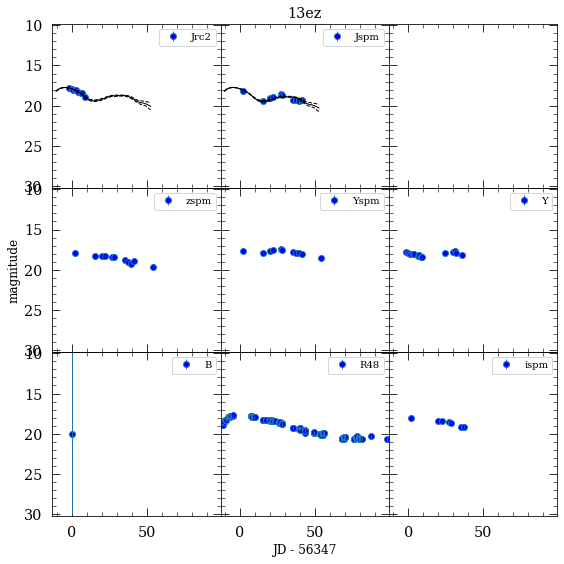

In [9]:
s.choose_model("EBV_model2", stype='st')
s.fit(["R48"],EBVhost=0)    #This SN is fitted initially in the r band due to the clear poor B-band data
s.fit(["Jspm","Jrc2"],Tmax=s.Tmax,EBVhost=0)
ufl=file1[0:5]+'_EBV2.snpy'
print(s.get_max("Jspm"))
#s.save(ufl)    #use #s.save(ufl) until happy with fitting then use s.save(ufl)